In [1]:
import requests
import pandas as pd
from datetime import datetime, date
import zipfile
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
import matplotlib.pyplot as plt

def download_gaincap(filename, path):
  tsdflg = True
  # url_gc_path="http://ratedata.gaincapital.com/"
  for i in range(len(filename)):
    url_file_path = filename[i]
    # url_date_path = "2018/03 March/"
    # url=url_gc_path+url_date_path+url_file_path
    # res = requests.get(url)

    # # ファイルの保存
    hd_path = path + url_file_path
    # f = open(hd_path, 'wb')
    # f.write(res.content)
    # f.close()

    # zipファイルからの読み込み
    file_csv = "USD_JPY_Week%d.csv" % (i+1)
    print(file_csv)
    try:
      f=zipfile.ZipFile(hd_path).open(file_csv)
      dfx = pd.read_csv(f, \
        index_col = 3)[['RateBid', 'RateAsk']]
      f.close()
      if tsdflg:
        tsd = dfx.copy()
        tsdflg = False
      else:
        tsd = tsd.append(dfx)
    except Exception:
      print("Error: open file %s."%filename[i])
  return tsd
  
if __name__ == '__main__':
  filename0 = ["USD_JPY_Week1.zip"]
  path0="/Users/hayate/Dropbox (Personal)/nikkei_software/forcas_finance_with_ML/downloaded/"
  ts = download_gaincap(filename0, path0)
  print(ts[-5:])
  print(ts.shape)
  print("end----------------------------------")
  # X = ts.diff().dropna().round(3).iloc[:-1].values * 1000
  # y = ts.diff().dropna().round(3).iloc[1:,0].values * 1000
  # # 訓練データとテストデータに分割
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

  # lr = LogisticRegression() # ロジスティック回帰
  # rfc = RandomForestClassifier() # ランダムフォレスト
  # nb = neighbors.KNeighborsClassifier() # k-近傍法

  # for clf, name in [(lr, 'Logistic'), (rfc, 'Random Forest'), \
  #                   (nb,'k-Neighbors')]:
  #   clf.fit(X_train, y_train) # 学習
  #   y_pred = clf.predict(X_test) # 予測
  #   accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
  #   print(name, 'test: ', accuracy * 100)

USD_JPY_Week1.csv
                               RateBid  RateAsk
RateDateTime                                   
2018-03-09 16:59:18.357000000  106.802  106.848
2018-03-09 16:59:18.607000000  106.802  106.847
2018-03-09 16:59:18.857000000  106.802  106.846
2018-03-09 16:59:20.357000000  106.802  106.851
2018-03-09 16:59:30.357000000  106.780  106.850
(424860, 2)
end----------------------------------


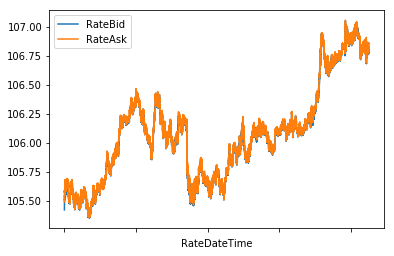

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
ts.plot()

In [3]:
ts.shape

(424860, 2)

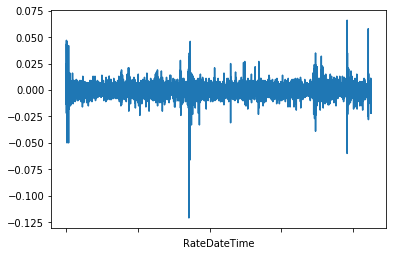

In [4]:
ts.RateBid.diff().plot()

In [6]:
ts.RateBid.diff().round(3).sort_values().dropna().unique()

array([-0.121, -0.066, -0.06 , -0.05 , -0.041, -0.04 , -0.039, -0.036,
       -0.034, -0.033, -0.032, -0.031, -0.029, -0.028, -0.027, -0.026,
       -0.025, -0.024, -0.023, -0.022, -0.021, -0.02 , -0.019, -0.018,
       -0.017, -0.016, -0.015, -0.014, -0.013, -0.012, -0.011, -0.01 ,
       -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003, -0.002,
       -0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,
        0.007,  0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,
        0.015,  0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,
        0.023,  0.024,  0.025,  0.026,  0.027,  0.028,  0.029,  0.031,
        0.032,  0.033,  0.034,  0.035,  0.036,  0.038,  0.04 ,  0.041,
        0.042,  0.043,  0.046,  0.047,  0.058,  0.066])

In [7]:
ts.RateBid.diff().round(3).sort_values().dropna().unique().shape

(86,)

In [8]:
ts.RateBid.diff().round(3).value_counts().sort_values(ascending=False).head(10)

-0.001    112779
 0.001    105741
 0.000     99526
 0.002     34431
-0.002     32963
 0.003     11033
-0.003      9761
 0.004      4728
-0.004      4286
 0.005      2055
Name: RateBid, dtype: int64

In [9]:
(ts.RateBid.diff().round(3).value_counts().sort_values(ascending=False).head(10)/len(ts))*100

-0.001    26.544980
 0.001    24.888434
 0.000    23.425599
 0.002     8.104081
-0.002     7.758556
 0.003     2.596855
-0.003     2.297463
 0.004     1.112837
-0.004     1.008803
 0.005     0.483689
Name: RateBid, dtype: float64

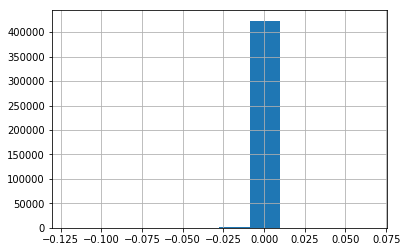

In [10]:
ts.RateBid.diff().round(3).hist()

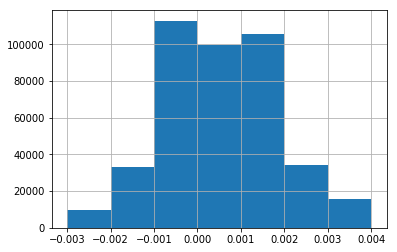

In [11]:
ts.RateBid.diff().round(3).hist(bins=[-0.003, -0.002, -0.001, 0, 0.001, 0.002, 0.003, 0.004])

USD_JPY_Week1.csv
                               RateBid  RateAsk
RateDateTime                                   
2018-03-09 16:59:18.357000000  106.802  106.848
2018-03-09 16:59:18.607000000  106.802  106.847
2018-03-09 16:59:18.857000000  106.802  106.846
2018-03-09 16:59:20.357000000  106.802  106.851
2018-03-09 16:59:30.357000000  106.780  106.850
(424860, 2)
end----------------------------------


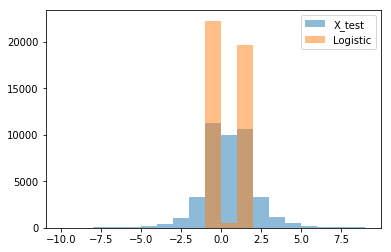

In [12]:
import requests
import pandas as pd
from datetime import datetime, date
import zipfile
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
import matplotlib.pyplot as plt

def download_gaincap(filename, path):
  tsdflg = True
  # url_gc_path="http://ratedata.gaincapital.com/"
  for i in range(len(filename)):
    url_file_path = filename[i]
    # url_date_path = "2018/03 March/"
    # url=url_gc_path+url_date_path+url_file_path
    # res = requests.get(url)

    # # ファイルの保存
    hd_path = path + url_file_path
    # f = open(hd_path, 'wb')
    # f.write(res.content)
    # f.close()

    # zipファイルからの読み込み
    file_csv = "USD_JPY_Week%d.csv" % (i+1)
    print(file_csv)
    try:
      f=zipfile.ZipFile(hd_path).open(file_csv)
      dfx = pd.read_csv(f, \
        index_col = 3)[['RateBid', 'RateAsk']]
      f.close()
      if tsdflg:
        tsd = dfx.copy()
        tsdflg = False
      else:
        tsd = tsd.append(dfx)
    except Exception:
      print("Error: open file %s."%filename[i])
  return tsd
  
if __name__ == '__main__':
  filename0 = ["USD_JPY_Week1.zip"]
  path0="/Users/hayate/Dropbox (Personal)/nikkei_software/forcas_finance_with_ML/downloaded/"
  ts = download_gaincap(filename0, path0)
  print(ts[-5:])
  print(ts.shape)
  print("end----------------------------------")
  X = ts.diff().dropna().round(3).iloc[:-1].values * 1000
  y = ts.diff().dropna().round(3).iloc[1:,0].values * 1000
  # 訓練データとテストデータに分割
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

  lr = LogisticRegression() # ロジスティック回帰
  rfc = RandomForestClassifier() # ランダムフォレスト
  nb = neighbors.KNeighborsClassifier() # k-近傍法

  # for clf, name in [(lr, 'Logistic'), (rfc, 'Random Forest'), \
  #                   (nb,'k-Neighbors')]:
  #   clf.fit(X_train, y_train) # 学習
  #   y_pred = clf.predict(X_test) # 予測
  #   accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
  #   print(name, 'test: ', accuracy * 100)
  
  clf, name = (lr, 'Logistic')

  bins = [i for i in range(-10, 10)]
  plt.hist(X_test[:,0], bins=bins, alpha=0.5, label='X_test')
  clf.fit(X_train, y_train) 
  y_pred = clf.predict(X_test) 
  plt.hist(y_pred, bins=bins, alpha=0.5, label=name)
  plt.legend()

USD_JPY_Week1.csv
                               RateBid  RateAsk
RateDateTime                                   
2018-03-09 16:59:18.357000000  106.802  106.848
2018-03-09 16:59:18.607000000  106.802  106.847
2018-03-09 16:59:18.857000000  106.802  106.846
2018-03-09 16:59:20.357000000  106.802  106.851
2018-03-09 16:59:30.357000000  106.780  106.850
(424860, 2)
end----------------------------------
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


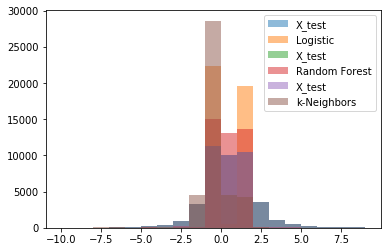

In [13]:
import requests
import pandas as pd
from datetime import datetime, date
import zipfile
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
import matplotlib.pyplot as plt

def download_gaincap(filename, path):
  tsdflg = True
  # url_gc_path="http://ratedata.gaincapital.com/"
  for i in range(len(filename)):
    url_file_path = filename[i]
    # url_date_path = "2018/03 March/"
    # url=url_gc_path+url_date_path+url_file_path
    # res = requests.get(url)

    # # ファイルの保存
    hd_path = path + url_file_path
    # f = open(hd_path, 'wb')
    # f.write(res.content)
    # f.close()

    # zipファイルからの読み込み
    file_csv = "USD_JPY_Week%d.csv" % (i+1)
    print(file_csv)
    try:
      f=zipfile.ZipFile(hd_path).open(file_csv)
      dfx = pd.read_csv(f, \
        index_col = 3)[['RateBid', 'RateAsk']]
      f.close()
      if tsdflg:
        tsd = dfx.copy()
        tsdflg = False
      else:
        tsd = tsd.append(dfx)
    except Exception:
      print("Error: open file %s."%filename[i])
  return tsd
  
if __name__ == '__main__':
  filename0 = ["USD_JPY_Week1.zip"]
  path0="/Users/hayate/Dropbox (Personal)/nikkei_software/forcas_finance_with_ML/downloaded/"
  ts = download_gaincap(filename0, path0)
  print(ts[-5:])
  print(ts.shape)
  print("end----------------------------------")
  X = ts.diff().dropna().round(3).iloc[:-1].values * 1000
  y = ts.diff().dropna().round(3).iloc[1:,0].values * 1000
  # 訓練データとテストデータに分割
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

  lr = LogisticRegression() # ロジスティック回帰
  rfc = RandomForestClassifier() # ランダムフォレスト
  nb = neighbors.KNeighborsClassifier() # k-近傍法

  # for clf, name in [(lr, 'Logistic'), (rfc, 'Random Forest'), \
  #                   (nb,'k-Neighbors')]:
  #   clf.fit(X_train, y_train) # 学習
  #   y_pred = clf.predict(X_test) # 予測
  #   accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
  #   print(name, 'test: ', accuracy * 100)
  
  for clf, name in [(lr, 'Logistic'), (rfc, 'Random Forest'), \
                    (nb,'k-Neighbors')]:
    # clf, name = (lr, 'Logistic')
    bins = [i for i in range(-10, 10)]
    plt.hist(X_test[:,0], bins=bins, alpha=0.5, label='X_test')
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    plt.hist(y_pred, bins=bins, alpha=0.5, label=name)
    plt.legend()

IndentationError: expected an indented block (<ipython-input-16-2a3ce916bbf5>, line 4)

In [17]:
  ts2 = []
  i = 0
  for b,a in zip(ts['RateBid'], ts['RateAsk']):
    if i == 0:
      bx = b
      ax = a
    if i > 0 and (b > ax or a < bx):
      ts2.append([b, a])      
      bx = b
      ax = a
    i += 1
  ts2=pd.DataFrame(ts2,columns=['RateBid','RateAsk'])

In [18]:
(len(ts2) / len(ts)) * 100

7.064209386621475

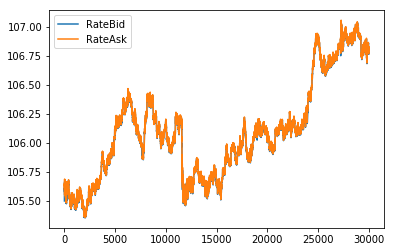

In [19]:
ts2.plot()